In [1]:
import numpy as np
import  pandas as pd


In [5]:
df=pd.read_csv('data/neo.csv')

In [6]:
df.sample(10)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
79193,54051023,(2020 PG2),0.033462,0.074824,38675.941449,6.329757e+06,Earth,False,24.50,False
7341,54017258,(2020 KK5),0.109284,0.244366,89749.836024,2.462403e+07,Earth,False,21.93,True
44952,54265880,(2022 FP2),0.005605,0.012533,29624.200075,4.030890e+07,Earth,False,28.38,False
63253,3654378,(2013 WF108),0.231502,0.517654,66297.001280,4.332727e+06,Earth,False,20.30,True
6471,54240294,(2022 BU2),0.225193,0.503547,72179.130051,5.307058e+07,Earth,False,20.36,False
20846,3381348,(2007 PS25),0.021113,0.047211,28785.903181,2.536770e+06,Earth,False,25.50,False
44830,3763282,(2016 VP1),0.009651,0.021579,60929.388681,4.713826e+05,Earth,False,27.20,False
2331,3303217,(2005 WX),0.011080,0.024777,32556.817320,1.982310e+07,Earth,False,26.90,False
68521,3739391,(2016 AH65),0.018389,0.041119,27595.039855,3.543426e+07,Earth,False,25.80,False
52947,3840847,(2019 GO3),0.080270,0.179490,28229.559830,3.735753e+07,Earth,False,22.60,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [9]:
df['orbiting_body'].nunique()

1

In [12]:
df=df.drop(['orbiting_body'],axis=1)

In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [14]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [16]:
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(0)

In [22]:
df=df.drop(['id','name'],axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_min    90836 non-null  float64
 1   est_diameter_max    90836 non-null  float64
 2   relative_velocity   90836 non-null  float64
 3   miss_distance       90836 non-null  float64
 4   absolute_magnitude  90836 non-null  float64
 5   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 3.6 MB


## EDA

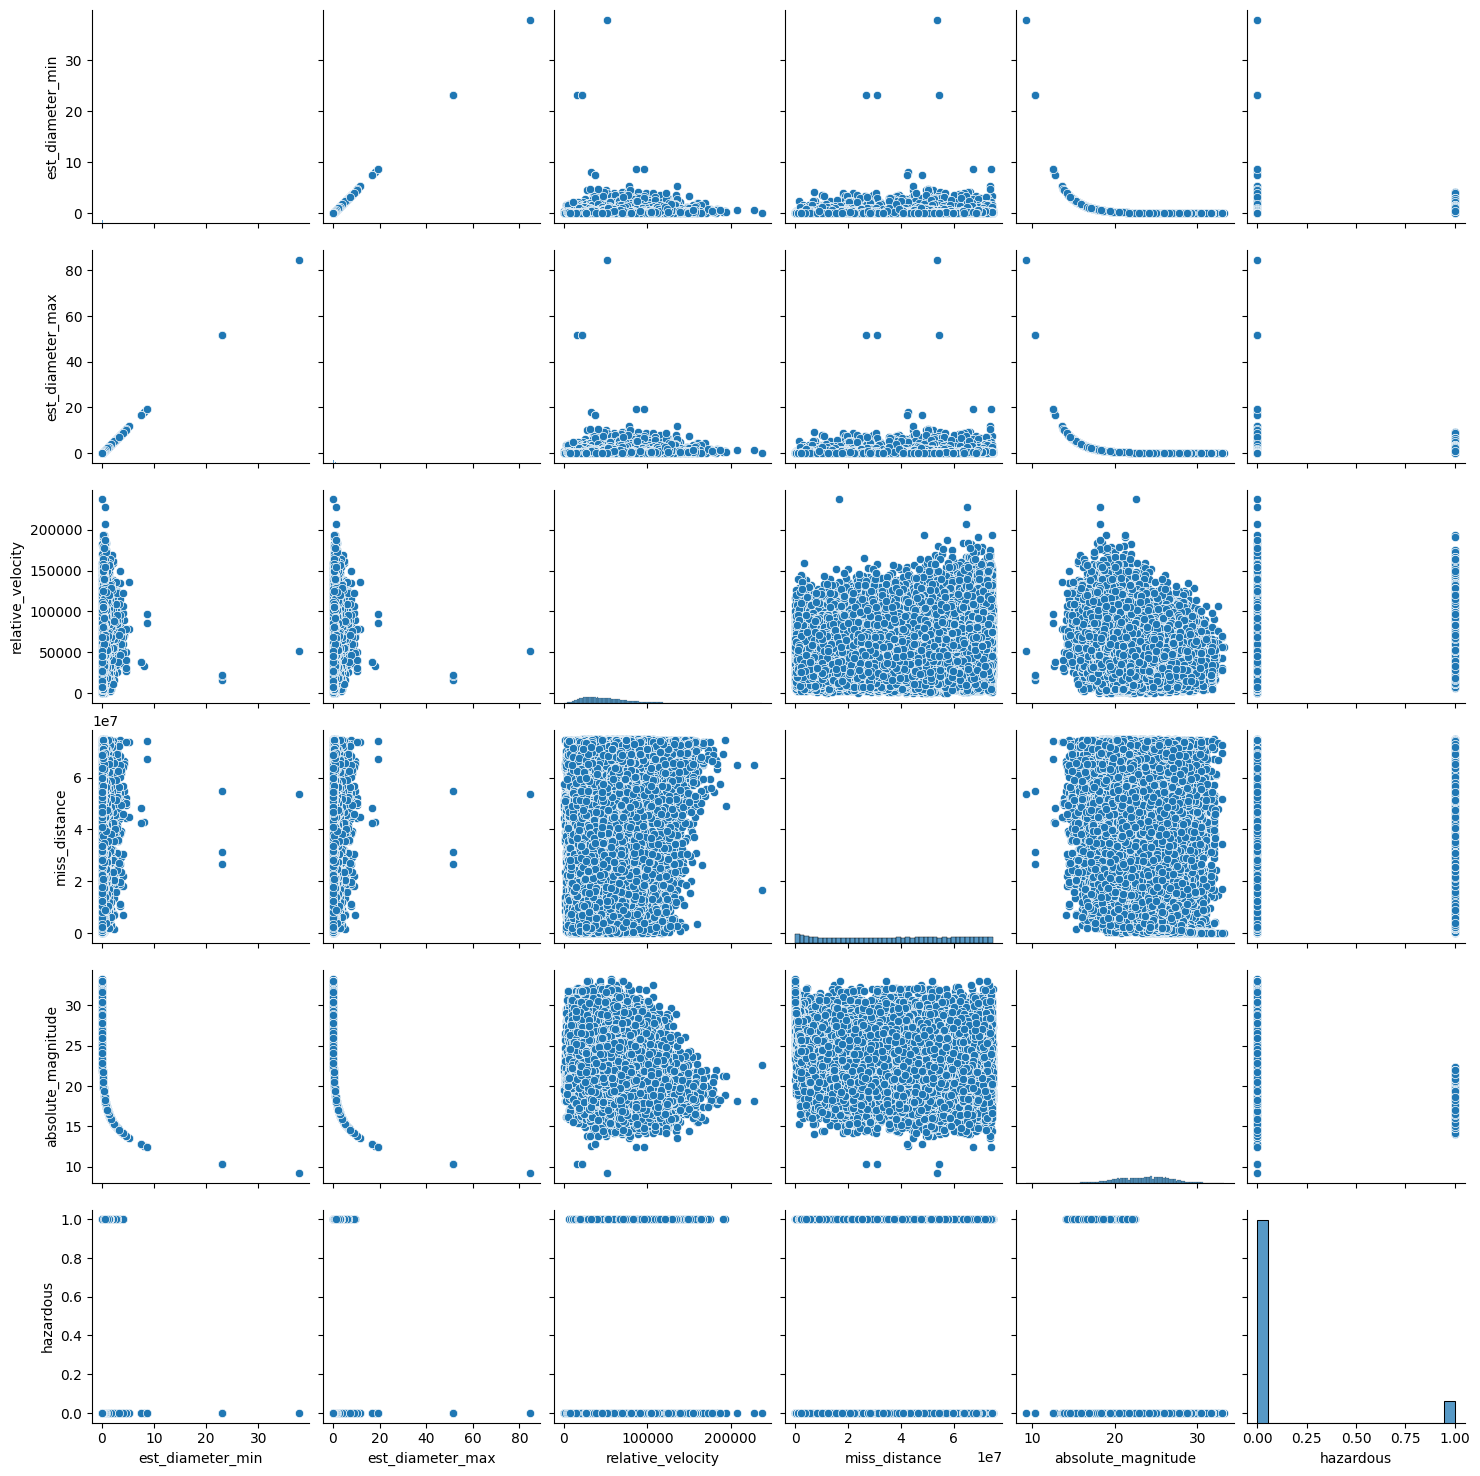

In [24]:
sns.pairplot(df)

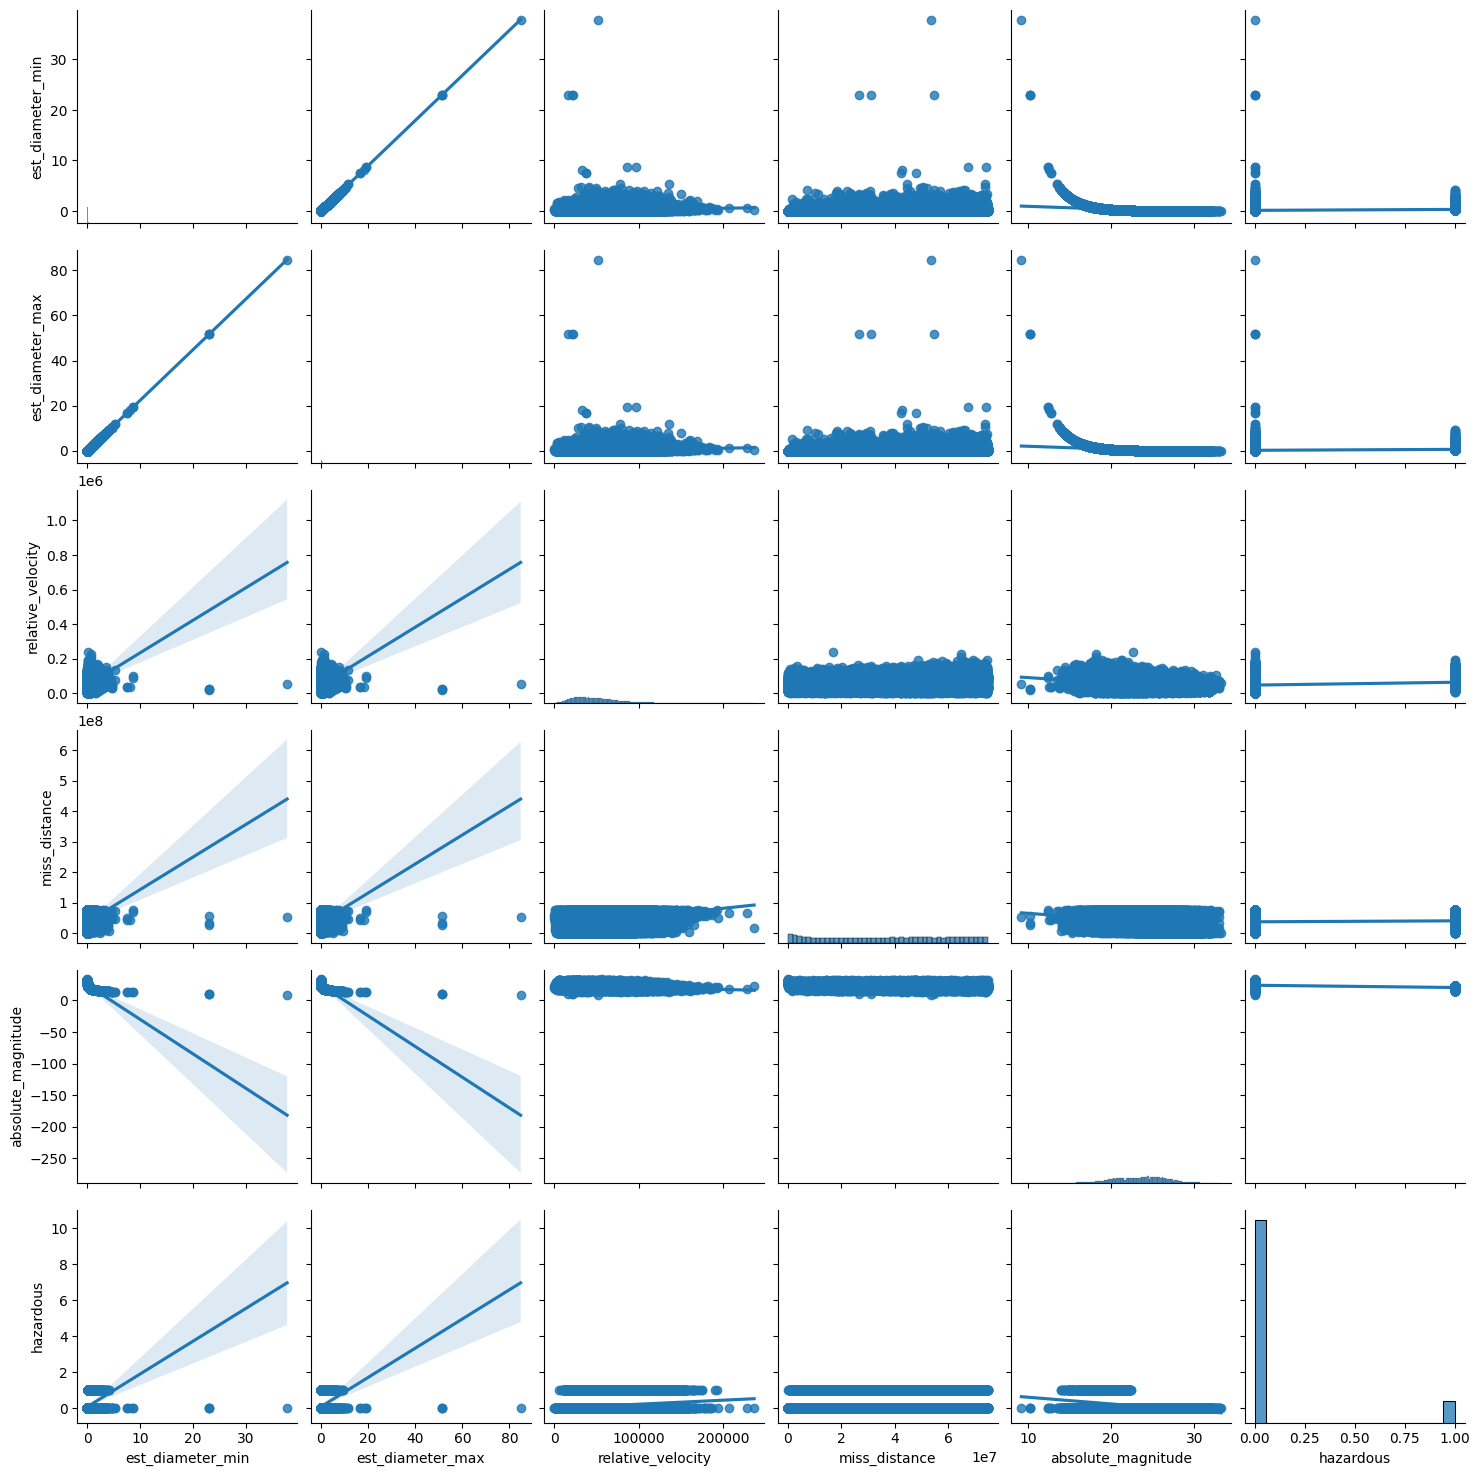

In [27]:
sns.pairplot(df,kind="reg")

In [31]:
X=df.drop(['hazardous'],axis=1)
y=df.iloc[:,-1].values

In [29]:
X

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09
...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,25.00
90832,0.016771,0.037501,46114.605073,5.432121e+07,26.00
90833,0.031956,0.071456,7566.807732,2.840077e+07,24.60
90834,0.007321,0.016370,69199.154484,6.869206e+07,27.80


In [35]:
y=y.astype(int)

In [36]:
y

array([0, 1, 0, ..., 0, 0, 0])

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [44]:
models={
    'DT':DecisionTreeClassifier(),
    'RF':RandomForestClassifier(),
    'XGB':XGBClassifier()
}

In [46]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
# model.score(X_test,y_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8903016292382211

In [48]:
parameters={'n_estimators':(50,100,200),'max_depth':[10,30,50],'n_jobs':[1,5,10]}
rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,y_train)
# y_pred=clf.predict(X_test)
# accuracy_score(y_pred,y_test)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 30, 50],
                         'n_estimators': (50, 100, 200), 'n_jobs': [1, 5, 10]})

In [55]:
final_rf=RandomForestClassifier(n_estimators=50,max_depth=30,n_jobs=1)
final_rf.fit(X_train,y_train)
y_pred=final_rf.predict(X_test)
accuracy_score(y_pred,y_test)

0.9173271686481727

In [50]:
xgb=XGBClassifier(backend="gpu",gpu_id="1",n_thread=4,n_estimators=50,max_depth=30,n_jobs=1)
xclf=GridSearchCV(xgb,parameters)
xclf.fit(X_train,y_train)


c:\Users\abirc\Desktop\Python\MLOPS\SpaceDetect\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:24:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\context.cc:52: Only 1 GPUs are visible, setting device ordinal to 0
  warnings.warn(smsg, UserWarning)
c:\Users\abirc\Desktop\Python\MLOPS\SpaceDetect\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:24:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "backend", "n_thread" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\abirc\Desktop\Python\MLOPS\SpaceDetect\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:24:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMa

GridSearchCV(estimator=XGBClassifier(backend='gpu', base_score=None,
                                     booster=None, callbacks=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None, gpu_id='1',
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, ...),
             param_grid={'max_depth': [10, 30, 50],
                         'n_estimators': (50, 100, 200), 'n_jobs': [1, 5, 10]})

In [57]:
final_xgb=XGBClassifier(backend="gpu",gpu_id="1",n_thread=4,n_estimators=50,max_depth=10,n_jobs=1)
final_xgb.fit(X_train,y_train)
y_pred=final_xgb.predict(X_test)
accuracy_score(y_pred,y_test)

c:\Users\abirc\Desktop\Python\MLOPS\SpaceDetect\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:57:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\context.cc:52: Only 1 GPUs are visible, setting device ordinal to 0
  warnings.warn(smsg, UserWarning)
c:\Users\abirc\Desktop\Python\MLOPS\SpaceDetect\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:57:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "backend", "n_thread" } are not used.

  warnings.warn(smsg, UserWarning)


0.9149603698811096

In [64]:
X_test.iloc[-1,:]

# y_test[0]

est_diameter_min      9.216265e-03
est_diameter_max      2.060820e-02
relative_velocity     1.094240e+04
miss_distance         2.730964e+06
absolute_magnitude    2.730000e+01
Name: 56, dtype: float64

In [74]:
def model(est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude):
    x=np.zeros(len(X.columns))
    x[0]=est_diameter_min
    x[1]=est_diameter_max
    x[2]=relative_velocity
    x[3]=miss_distance
    x[4]=absolute_magnitude

    if(final_rf.predict([x])[0]==1):
        return "Hazardous"
    else:
        return "Safe"

In [75]:
model(0.0161642283,0.0361443134,32340.4758712861,43544634.337745965,26.08)

c:\Users\abirc\Desktop\Python\MLOPS\SpaceDetect\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'Safe'

In [76]:
import pickle
with open('SpaceDetect','wb') as f:
    pickle.dump(final_rf,f)

In [78]:
import json
columns ={
    'data_columns':[col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    (json.dump(columns,f))